In [1]:
import numpy as np

def generate_quadratic_bezier(p0, p1, p2):
    # calculate the control point
    t = 0.5
    q0 = p0 + t * (p1 - p0)
    q1 = p1 + t * (p2 - p1)
    c = 2 * p1 - q0

    # define the curve function
    def curve(t):
        return (1-t)**2*p0 + 2*(1-t)*t*c + t**2*p2
    
    return curve


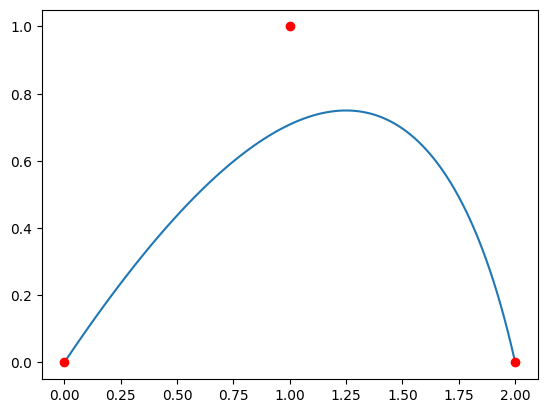

In [2]:
import matplotlib.pyplot as plt

# define the three points
p0 = np.array([0, 0])
p1 = np.array([1, 1])
p2 = np.array([2, 0])

# generate the curve function
curve_func = generate_quadratic_bezier(p0, p1, p2)

# generate the curve points
t_values = np.linspace(0, 1, 100)
curve_points = np.array([curve_func(t) for t in t_values])

# plot the curve and points
plt.plot(curve_points[:,0], curve_points[:,1])
plt.plot(p0[0], p0[1], 'ro')
plt.plot(p1[0], p1[1], 'ro')
plt.plot(p2[0], p2[1], 'ro')
plt.show()


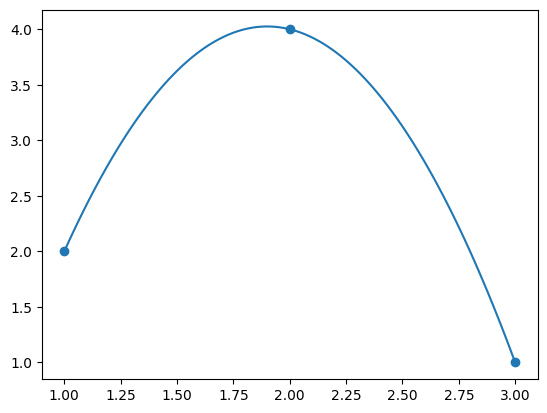

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the three points
p1 = np.array([1, 2])
p2 = np.array([2, 4])
p3 = np.array([3, 1])

# Create the coefficient matrix
A = np.array([[p1[0]**2, p1[0], 1],
              [p2[0]**2, p2[0], 1],
              [p3[0]**2, p3[0], 1]])

# Create the constant matrix
B = np.array([p1[1], p2[1], p3[1]])

# Solve for the coefficients
a, b, c = np.linalg.solve(A, B)

# Create a range of x values
x = np.linspace(p1[0], p3[0], 100)

# Evaluate the quadratic function at the x values
y = a*x**2 + b*x + c

# Plot the curve and points
plt.plot(x, y)
plt.scatter([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]])
plt.show()


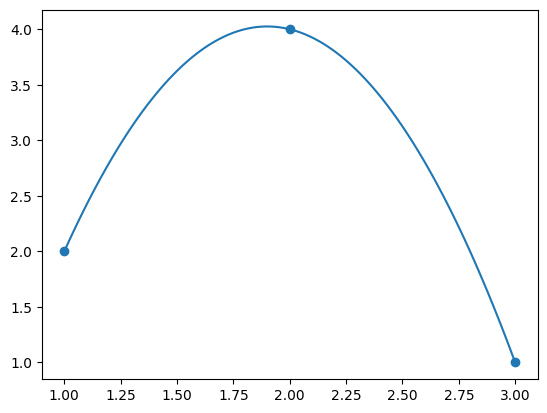

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the three points
p1 = np.array([1, 2])
p2 = np.array([2, 4])
p3 = np.array([3, 1])

# Calculate the slopes between each pair of points
slope_12 = (p2[1]-p1[1])/(p2[0]-p1[0])
slope_23 = (p3[1]-p2[1])/(p3[0]-p2[0])

# Check if the points are collinear
if np.isclose(slope_12, slope_23):
    # Use a linear function
    a = 0
    b = slope_12
    c = p1[1] - slope_12*p1[0]
else:
    # Use a quadratic function
    # Create the coefficient matrix
    A = np.array([[p1[0]**2, p1[0], 1],
                  [p2[0]**2, p2[0], 1],
                  [p3[0]**2, p3[0], 1]])

    # Create the constant matrix
    B = np.array([p1[1], p2[1], p3[1]])

    # Solve for the coefficients
    a, b, c = np.linalg.solve(A, B)

# Create a range of x values
x = np.linspace(p1[0], p3[0], 100)

# Evaluate the function at the x values
if np.isclose(slope_12, slope_23):
    # Use a linear function
    y = b*x + c
else:
    # Use a quadratic function
    y = a*x**2 + b*x + c

# Plot the curve and points
plt.plot(x, y)
plt.scatter([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]])
plt.show()


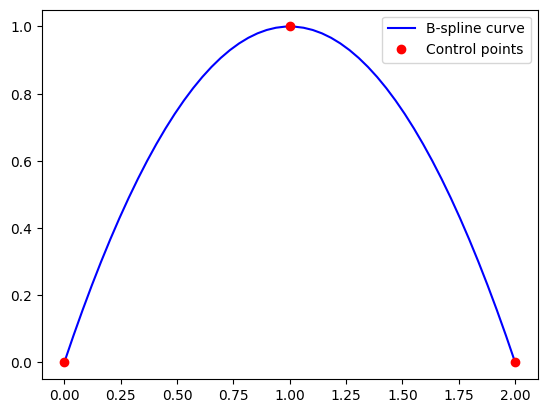

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Define the control points
p1 = np.array([0.0, 0.0])
p2 = np.array([1.0, 1.0])
p3 = np.array([2.0, 0.0])
control_points = np.array([p1, p2, p3])

# Define the knot vector
knots = np.array([10, 0, 0, 2, 1, 1])

# Define the degree of the B-spline curve
degree = 2

# Generate the B-spline curve
tck, u = splprep([control_points[:,0], control_points[:,1]], k=degree, s=0)
u_new = np.linspace(0, 1, num=50, endpoint=True)
x_new, y_new = splev(u_new, tck)

# Plot the B-spline curve
plt.plot(x_new, y_new, 'b-', label='B-spline curve')
plt.plot(control_points[:,0], control_points[:,1], 'ro', label='Control points')
plt.legend(loc='best')
plt.show()

